Find a good approximation to $$\sum_{j=1}^\infty \frac{6}{j^2} = \pi^2$$ by extrapolation.  

Hint: Define the function 

$$f:\{1/n:n∈N\} → R : x → \sum_{j=1}^{1/x}\frac{6}{j^2}, $$

apply polynomial interpolation with knots $x_i= 2^{−i}$, and evaluate the interpolationpolynomial at $x=0$.


Text(0.5, 1.0, 'Convergence plot of ')

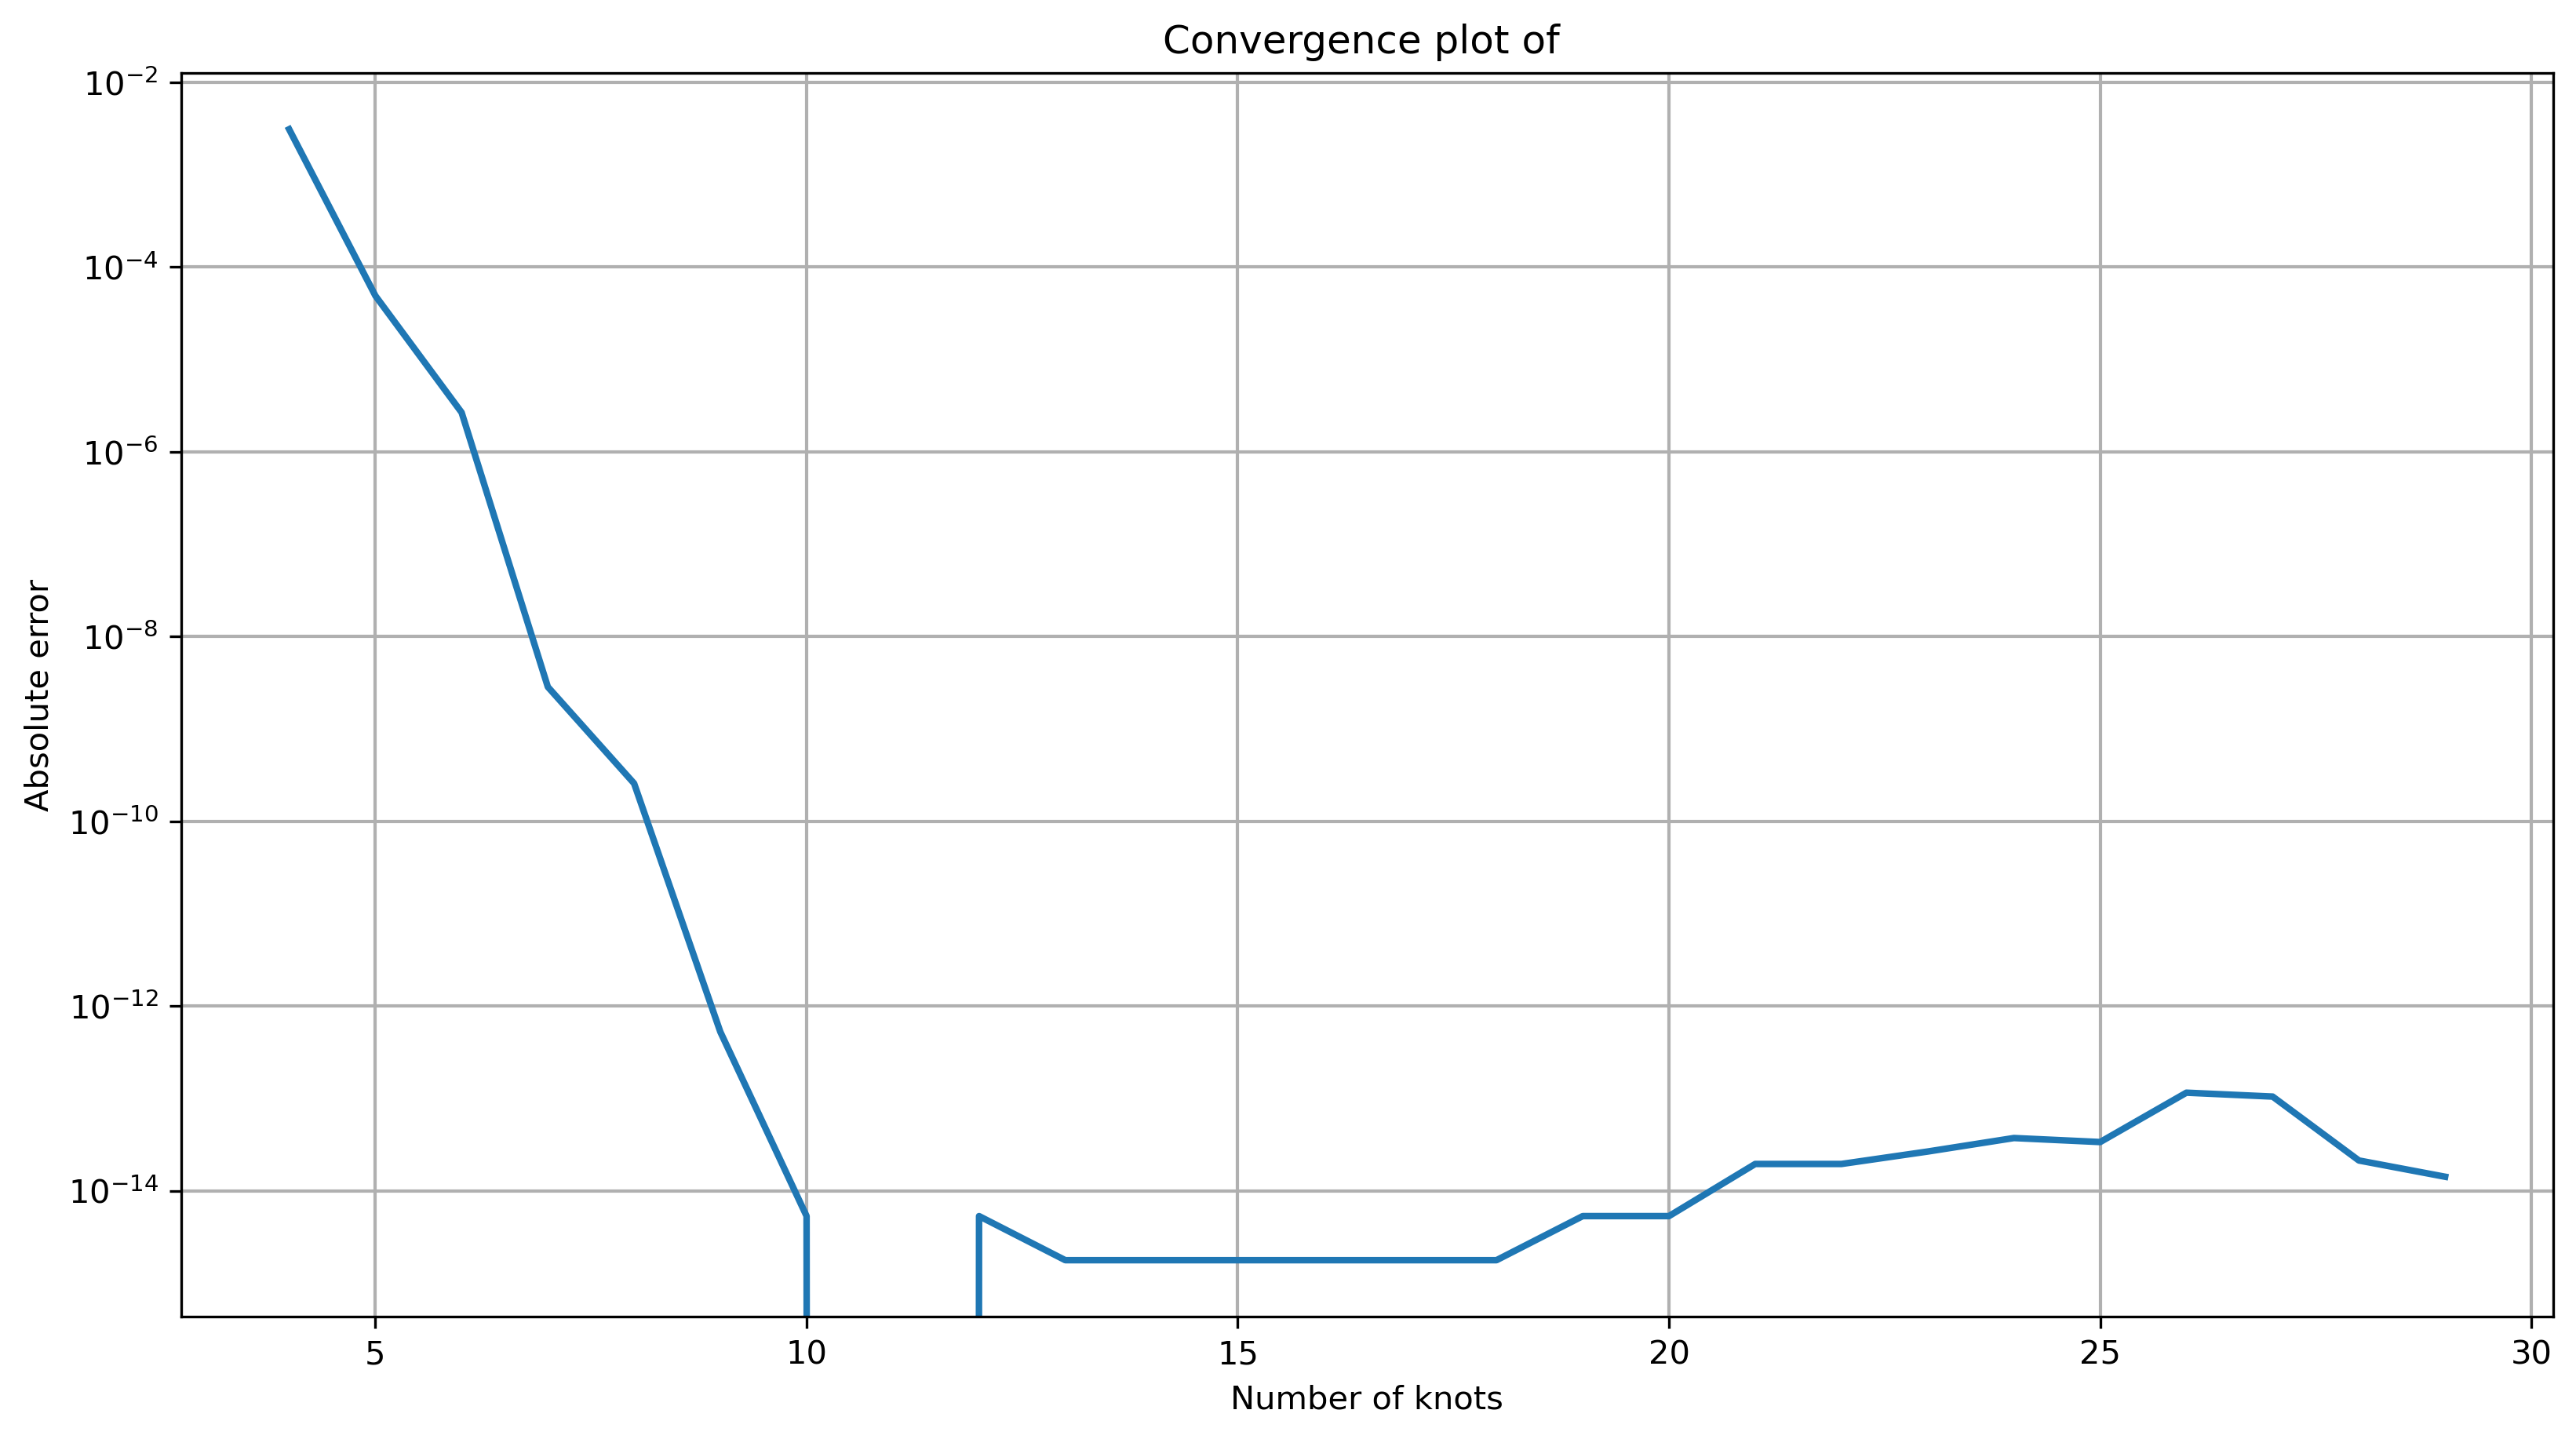

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['grid.linewidth'] = 1.0

approximation_list = []
n_max_list = range(4, 30)


def aitken_neville(x_nodes, y_nodes, x):
    p = y_nodes
    n = len(x_nodes)-1

    for m in range(n):
        for i in range(n-m):
            j = i+1+m
            p[i] = ((x-x_nodes[j]) * p[i] - (x-x_nodes[i]) * p[i+1]) / (x_nodes[i] - x_nodes[j])

    return p[0]


def reihen_glied(n):
    j = np.arange(n)+1
    return np.sum(6/j**2)


for n_max in n_max_list:
    i = np.arange(n_max)
    x_list = 2.**-i
    n_list = 2.**i

    y_list = [reihen_glied(current_n) for current_n in n_list]

    approximation_list.append(aitken_neville(x_list, y_list, 0))
    

approximation_list = np.array(approximation_list)
plt.figure(figsize = (13, 7))
plt.plot(n_max_list, np.abs(approximation_list - np.pi**2))
plt.yscale("log")
plt.grid()
plt.xlabel("Number of knots")
plt.ylabel("Absolute error")
plt.title("Error of approximation")